# Requirements

In [48]:
import numpy as np
import pandas as pd

# Add as many imports as you need.
# Add as many imports as you need.
from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [49]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./data/user_behavior_data.csv")
df = df.drop(columns="User ID")
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,NaN,22.0,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,NaN,59.0,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457.0,50.0,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224.0,44.0,Male,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            630 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         560 non-null    float64
 7   Age                         665 non-null    float64
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 54.8+ KB


Preprocess the input and the output variables appropriately.

In [51]:
df.describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,560.000000,665.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,942.332143,38.342857,2.990000
std,177.199484,3.068584,819.136414,26.943324,651.190675,12.038081,1.401476
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,113.250000,2.500000,722.250000,26.000000,370.750000,28.000000,2.000000
50%,227.500000,4.900000,1502.500000,49.000000,827.500000,38.000000,3.000000
75%,434.250000,7.400000,2229.500000,74.000000,1377.750000,49.000000,4.000000
max,598.000000,12.000000,2993.000000,99.000000,2493.000000,59.000000,5.000000


In [52]:
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,Device Model,0,0.0,700
1,Operating System,70,10.0,700
2,App Usage Time (min/day),0,0.0,700
3,Screen On Time (hours/day),0,0.0,700
4,Battery Drain (mAh/day),0,0.0,700
5,Number of Apps Installed,0,0.0,700
6,Data Usage (MB/day),140,20.0,700
7,Age,35,5.0,700
8,Gender,0,0.0,700
9,User Behavior Class,0,0.0,700


In [53]:
df.columns
target_column = "User Behavior Class"

In [54]:
balance_table(df, target_column=target_column)

,Class,Count,Percentage,Total
0,1,136,19.428571,700
1,2,146,20.857143,700
2,3,143,20.428571,700
3,4,139,19.857143,700
4,5,136,19.428571,700


In [55]:
# Write your code here. Add as many boxes as you need.

Explore the dataset using visualizations of your choice.

In [56]:
# Write your code here. Add as many boxes as you need.

Check if the dataset is balanced.

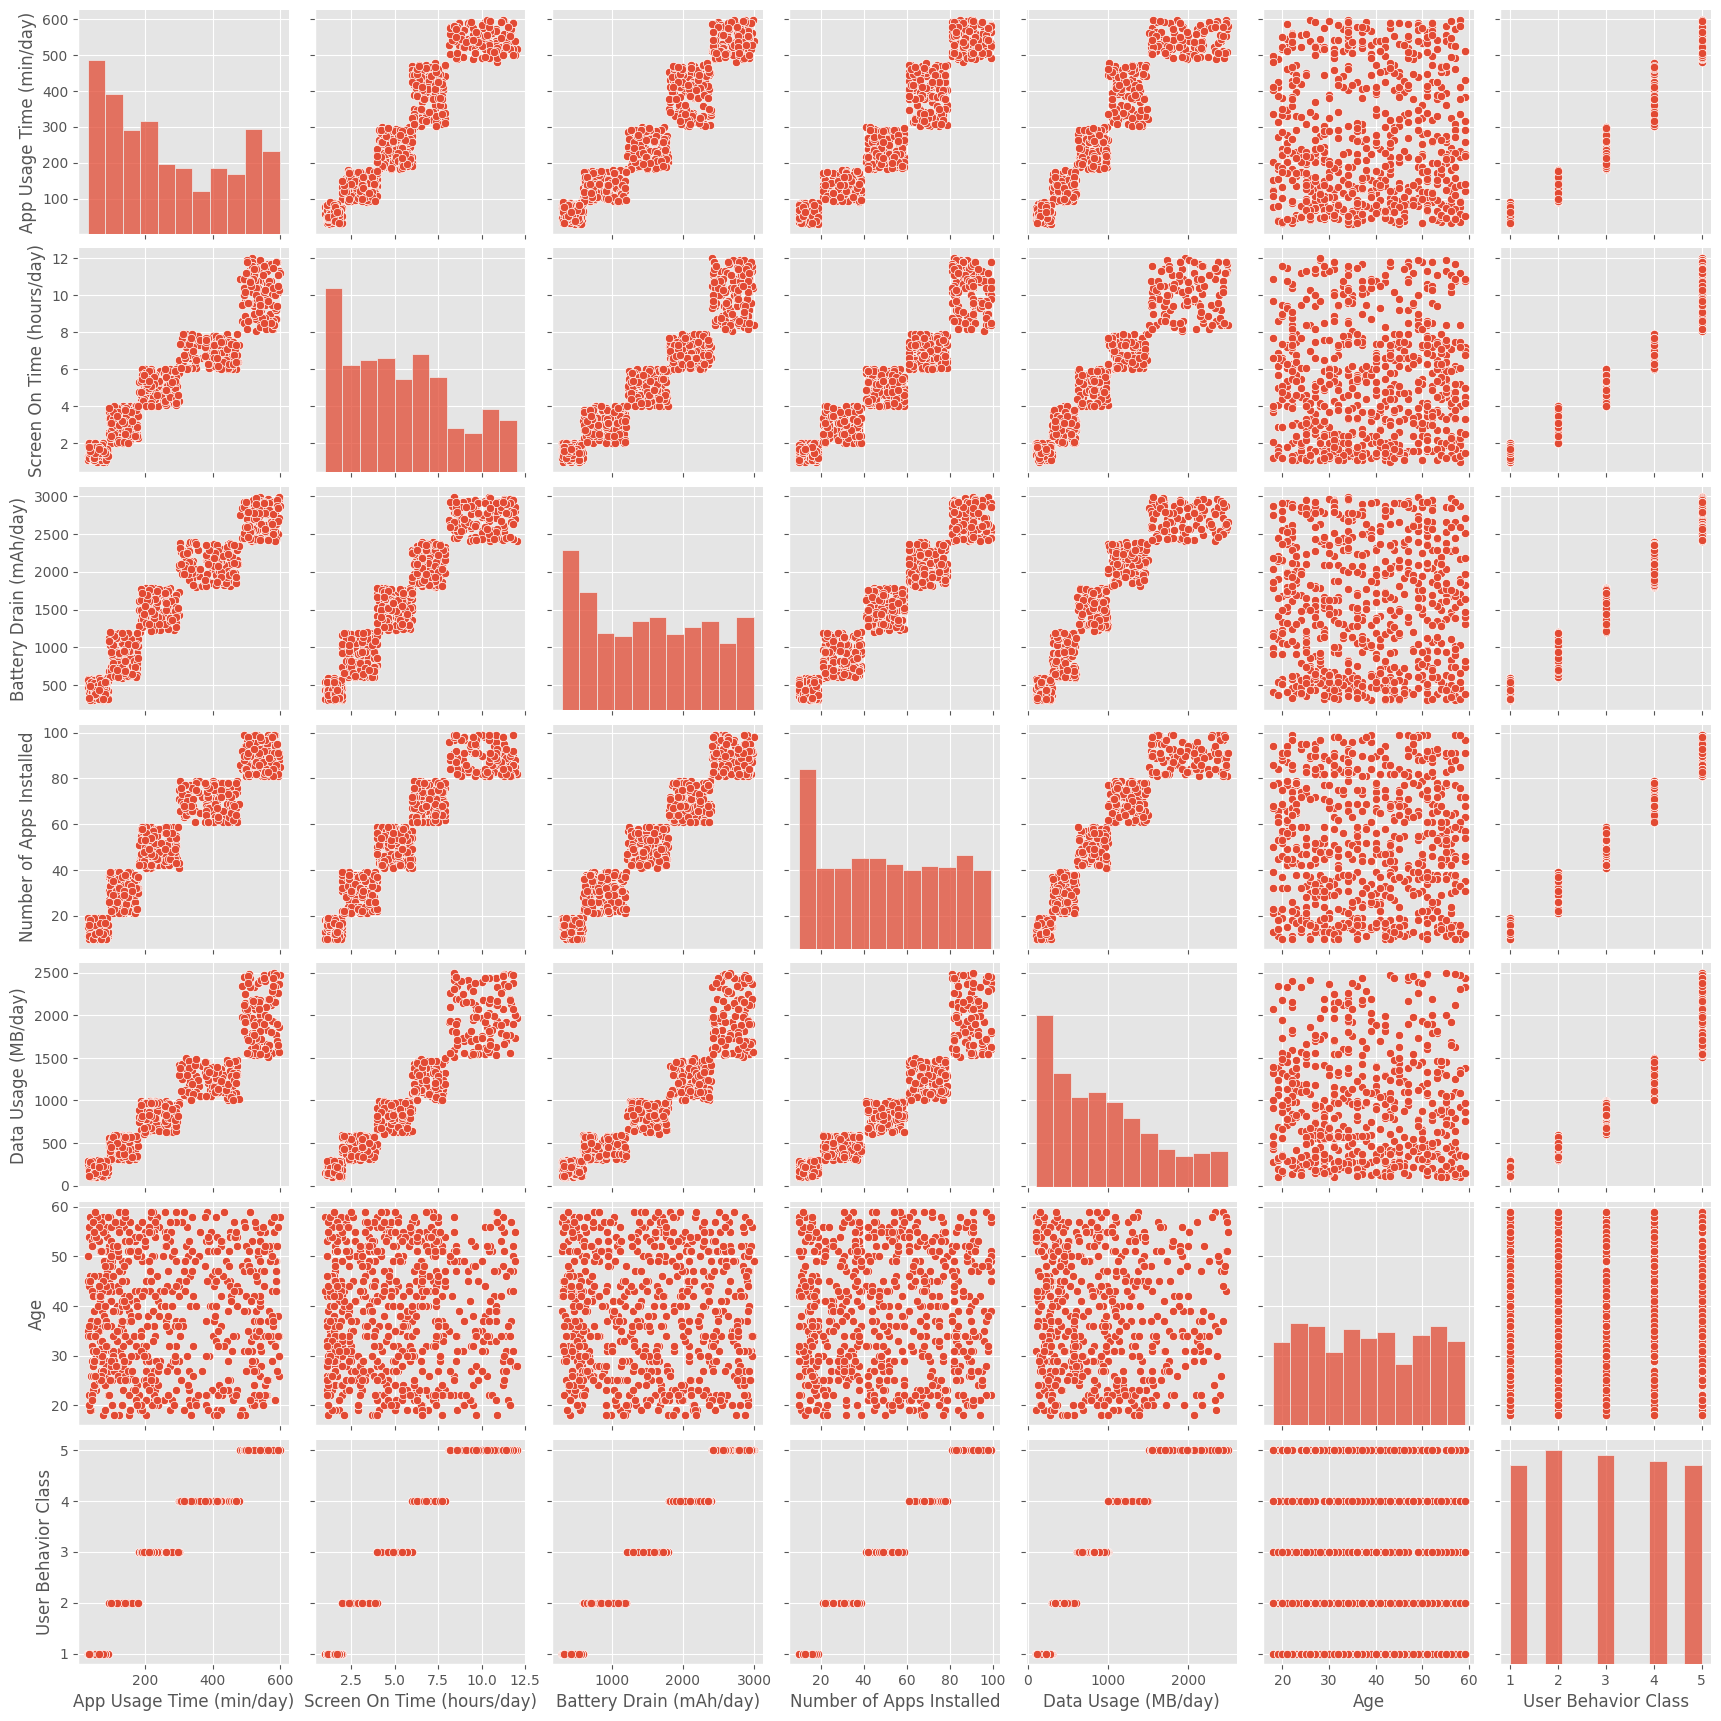

In [57]:
# Write your code here. Add as many boxes as you need.
sns.pairplot(df)

<Axes: >

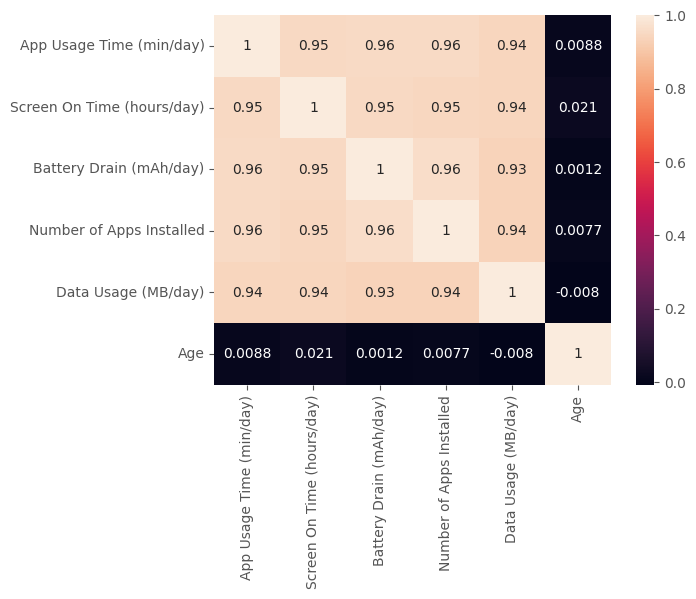

In [58]:
sns.heatmap(df.drop(columns=["User Behavior Class", "Device Model", "Gender", "Operating System"]).corr(), annot=True)

In [59]:
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,Device Model,0,0.0,700
1,Operating System,70,10.0,700
2,App Usage Time (min/day),0,0.0,700
3,Screen On Time (hours/day),0,0.0,700
4,Battery Drain (mAh/day),0,0.0,700
5,Number of Apps Installed,0,0.0,700
6,Data Usage (MB/day),140,20.0,700
7,Age,35,5.0,700
8,Gender,0,0.0,700
9,User Behavior Class,0,0.0,700


<Axes: >

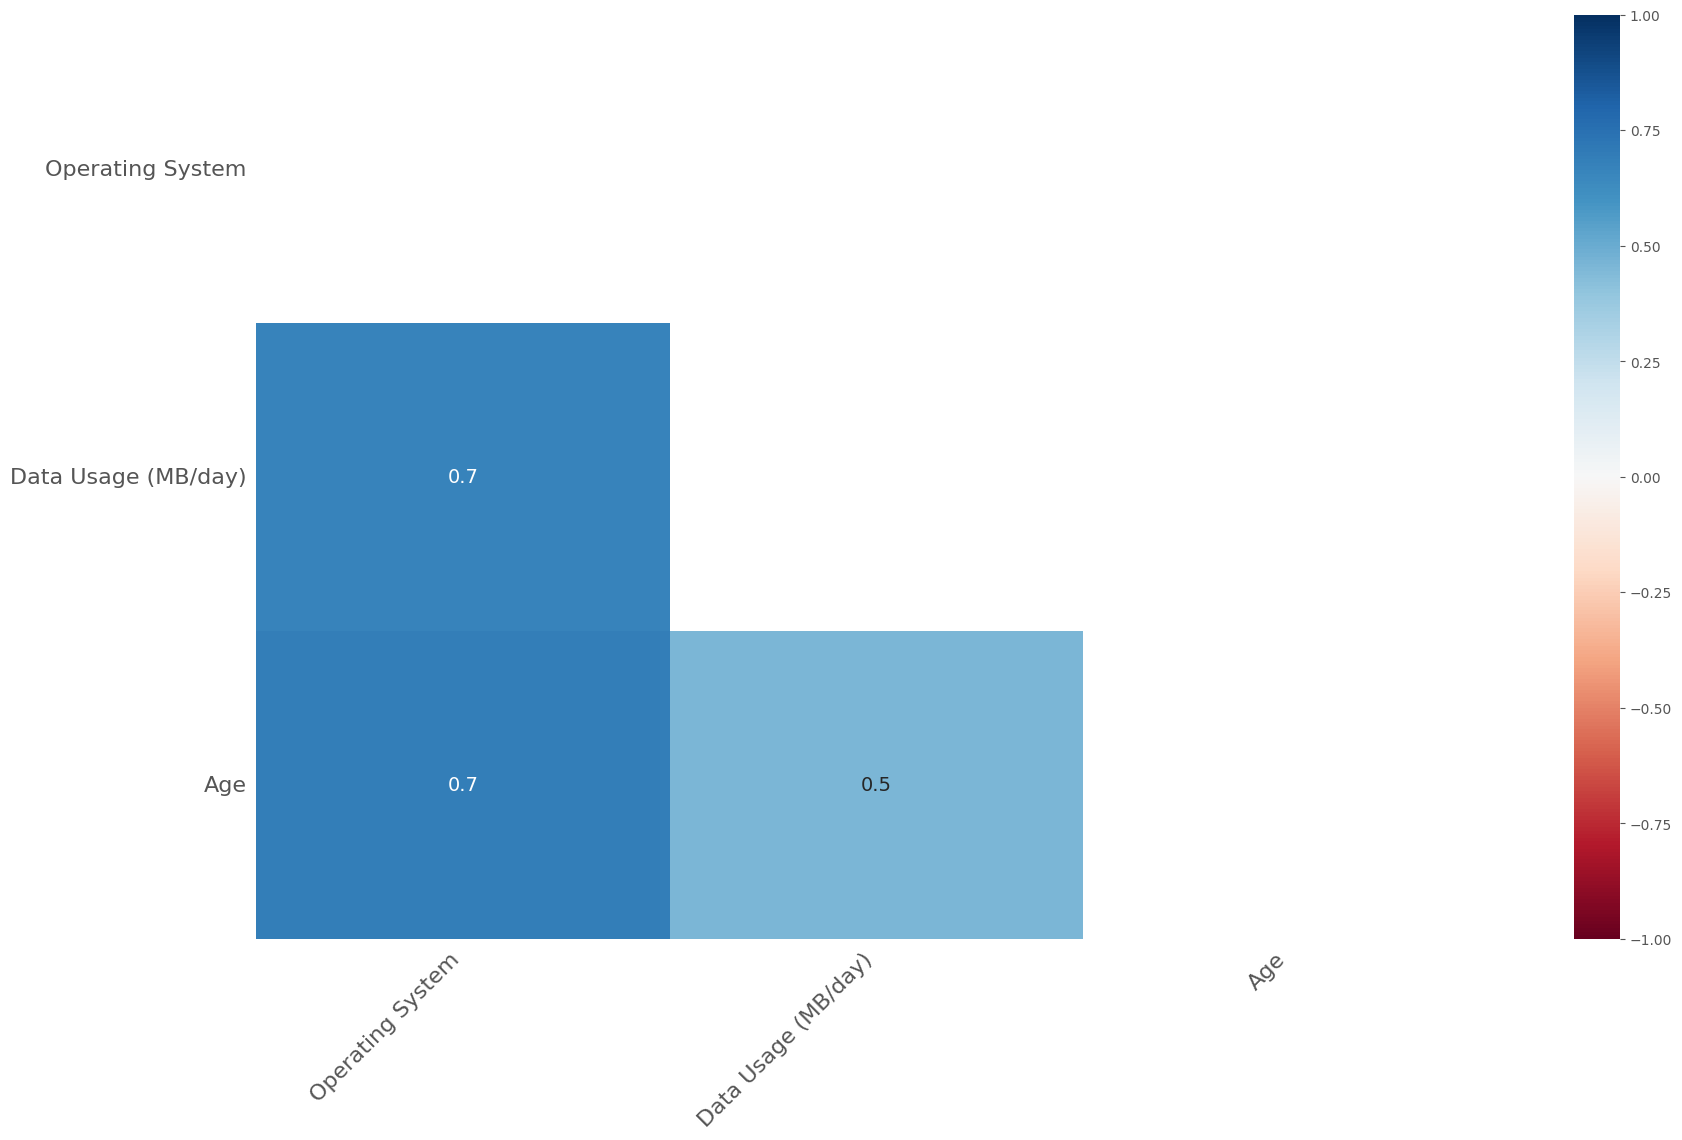

In [60]:
msno.heatmap(df)

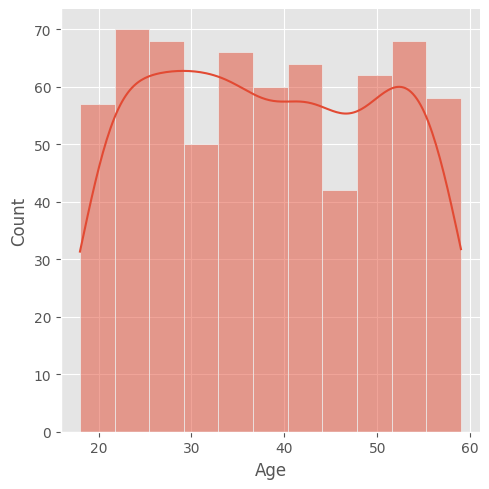

In [61]:
show_displots(df, columns=["Age"])

In [62]:
one_hot_encoder = OneHotEncoder()

In [63]:
one_hot_encoder.fit(df[["Operating System"]])

OneHotEncoder()

In [64]:
encoded = one_hot_encoder.transform(df[["Operating System"]])
print(encoded)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 700 stored elements and shape (700, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 1)	1.0
  (10, 2)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 0)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (675, 0)	1.0
  (676, 0)	1.0
  (677, 0)	1.0
  (678, 0)	1.0
  (679, 1)	1.0
  (680, 0)	1.0
  (681, 0)	1.0
  (682, 0)	1.0
  (683, 0)	1.0
  (684, 0)	1.0
  (685, 0)	1.0
  (686, 0)	1.0
  (687, 0)	1.0
  (688, 0)	1.0
  (689, 0)	1.0
  (690, 0)	1.0
  (691, 1)	1.0
  (692, 0)	1.0
  (693, 0)	1.0
  (694, 0)	1.0
  (695, 1)	1.0
  (696, 0)	1.0
  (697, 0)	1.0
  (698, 0)	1.0
  (699, 0)	1.0


In [65]:
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,NaN,22.0,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,NaN,59.0,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457.0,50.0,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224.0,44.0,Male,1


In [66]:
import numpy as np

In [67]:
dummies = pd.get_dummies(df["Operating System"])
dummies = dummies.replace(True, 1, inplace=False)
dummies = dummies.replace(False, 0, inplace=False)

C:\Users\User-PC\AppData\Local\Temp\ipykernel_4556\544086245.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummies = dummies.replace(False, 0, inplace=False)


In [68]:
# ios_null = dummies[dummies["iOS"] == 0]
# null =  ios_null[ios_null["Android"] == 0]
# dummies['Unknown'] = dummies.isnull().all(axis=1).astype(int)
dummies.iloc[(dummies['Android'] == 0) & (dummies['iOS'] == 0), :] = np.nan
dummies['Unknown'] = dummies.isnull().all(axis=1).astype(int)
dummies["Unknown"] =  dummies["Unknown"].replace(1, np.nan)
df_copy = pd.concat([df, dummies], axis=1)
# df_copy = pd.concat([df, dummies], axis=1)
df_copy.drop(columns="Operating System", inplace=True)
df_copy

,Device Model,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Android,iOS,Unknown
0,Google Pixel 5,393,6.4,1872,67,1122.0,40.0,Male,4,1.0,0.0,0.0
1,OnePlus 9,268,4.7,1331,42,944.0,47.0,Female,3,1.0,0.0,0.0
2,Xiaomi Mi 11,154,4.0,761,32,NaN,42.0,Male,2,1.0,0.0,0.0
3,Google Pixel 5,239,4.8,1676,56,871.0,20.0,Male,3,1.0,0.0,0.0
4,iPhone 12,187,4.3,1367,58,988.0,31.0,Female,3,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,92,3.9,1082,26,NaN,22.0,Male,2,0.0,1.0,0.0
696,Xiaomi Mi 11,316,6.8,1965,68,NaN,59.0,Male,4,1.0,0.0,0.0
697,Google Pixel 5,99,3.1,942,22,457.0,50.0,Female,2,1.0,0.0,0.0
698,Samsung Galaxy S21,62,1.7,431,13,224.0,44.0,Male,1,1.0,0.0,0.0


In [69]:
df_copy.columns

Index(['Device Model', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class', 'Android', 'iOS', 'Unknown'],
      dtype='object')

In [70]:
df.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class'],
      dtype='object')

In [71]:
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,Device Model,0,0.0,700
1,Operating System,70,10.0,700
2,App Usage Time (min/day),0,0.0,700
3,Screen On Time (hours/day),0,0.0,700
4,Battery Drain (mAh/day),0,0.0,700
5,Number of Apps Installed,0,0.0,700
6,Data Usage (MB/day),140,20.0,700
7,Age,35,5.0,700
8,Gender,0,0.0,700
9,User Behavior Class,0,0.0,700


In [72]:
# df_copy2 = uncorrelated_imputer(df, missing_feature="Operating System", strategy="mode")
df_copy_2 = df.copy()
# df_copy_2["Operating System"] = df["Operating System"].fillna(df["Operating System"].mode()[0])

<Axes: xlabel='Operating System'>

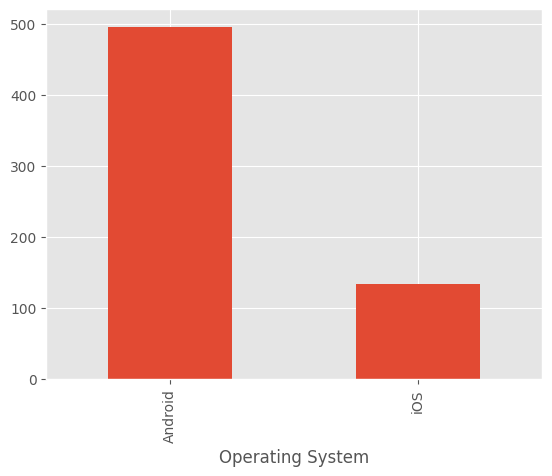

In [73]:
df["Operating System"].value_counts().plot.bar()

<Axes: xlabel='Operating System'>

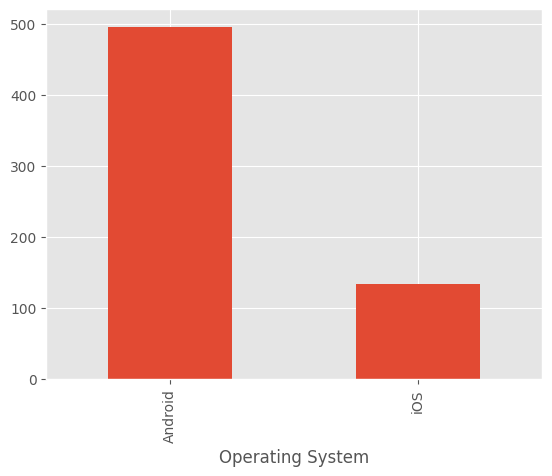

In [74]:
df_copy_2["Operating System"].value_counts().plot.bar()

In [75]:
df.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class'],
      dtype='object')

In [76]:
df_copy_3 = correlated_imputer(df_copy_2, correlated_columns=["App Usage Time (min/day)", "Data Usage (MB/day)", "Screen On Time (hours/day)", "Battery Drain (mAh/day)"], strategy="mice")

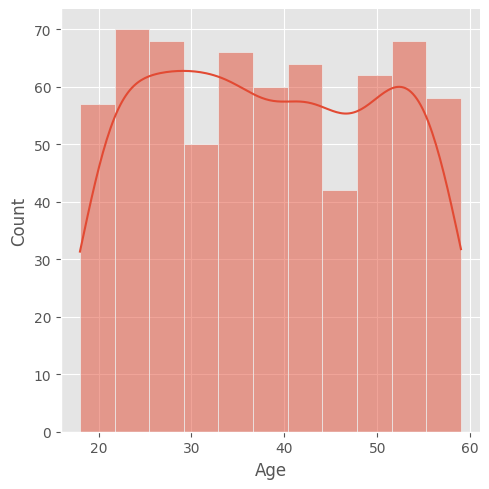

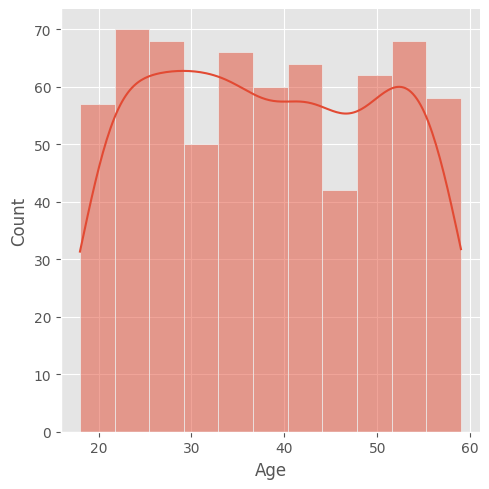

In [77]:
show_displot_before_and_after_inputation(df_copy_2, df_copy_3, missing_feature_name="Age")

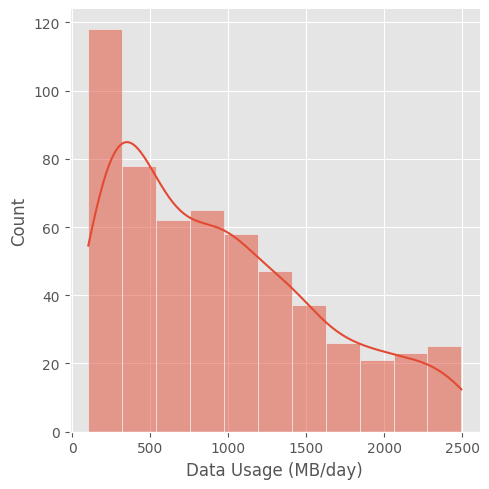

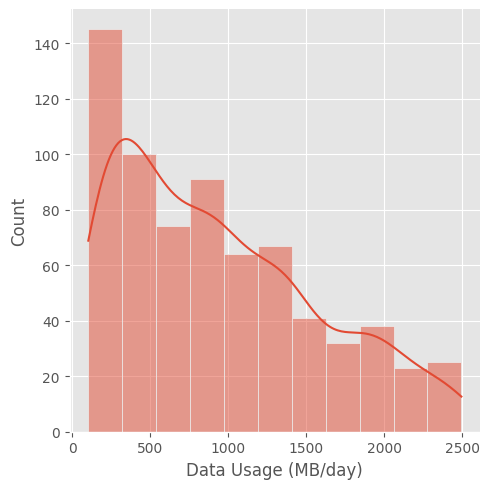

In [78]:
show_displot_before_and_after_inputation(df_copy_2, df_copy_3, missing_feature_name="Data Usage (MB/day)")


In [79]:
# dummies =  pd.get_dummies(df_copy_3["Operating System"])
# dummies = dummies.replace(True, 1)
# dummies = dummies.replace(False, 0)
# df_copy_3 = pd.concat([df_copy_3, dummies], axis = 1)
# df_copy_3.drop(columns="Operating System", inplace=True)
# df_copy_3

In [80]:
df_copy_3

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393.0,6.4,1872.0,67,1122.000000,40.0,Male,4
1,OnePlus 9,Android,268.0,4.7,1331.0,42,944.000000,47.0,Female,3
2,Xiaomi Mi 11,Android,154.0,4.0,761.0,32,551.151735,42.0,Male,2
3,Google Pixel 5,Android,239.0,4.8,1676.0,56,871.000000,20.0,Male,3
4,iPhone 12,iOS,187.0,4.3,1367.0,58,988.000000,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92.0,3.9,1082.0,26,495.243125,22.0,Male,2
696,Xiaomi Mi 11,Android,316.0,6.8,1965.0,68,1185.944127,59.0,Male,4
697,Google Pixel 5,Android,99.0,3.1,942.0,22,457.000000,50.0,Female,2
698,Samsung Galaxy S21,Android,62.0,1.7,431.0,13,224.000000,44.0,Male,1


In [81]:
# df_copy_3.drop(columns=["Android", "iOS"])

In [82]:
# df_copy_4 = correlated_imputer(df_copy_3, correlated_columns=["Age", "Data Usage (MB/day)", "Android", "iOS"], strategy="mice")
df_copy_4 = uncorrelated_imputer(df_copy_3, missing_feature="Age", strategy="mean")

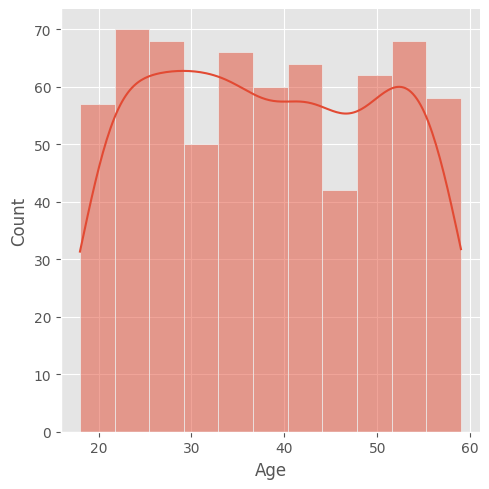

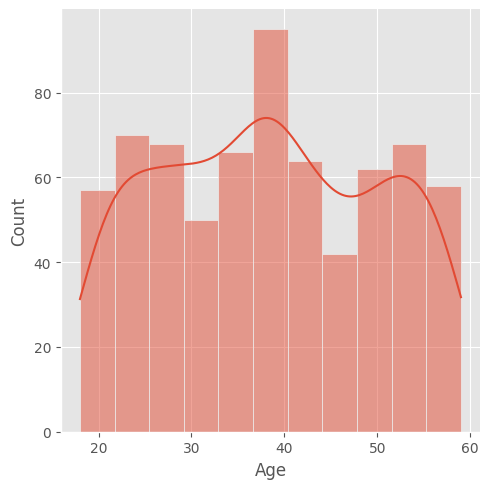

In [83]:
show_displot_before_and_after_inputation(df_copy_3, df_copy_4, missing_feature_name="Age")

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [84]:
missing_table(df_copy_4)

,Feature,CountMissing,PercentageMissing,Total
0,Device Model,0,0.0,700
1,Operating System,70,10.0,700
2,App Usage Time (min/day),0,0.0,700
3,Screen On Time (hours/day),0,0.0,700
4,Battery Drain (mAh/day),0,0.0,700
5,Number of Apps Installed,0,0.0,700
6,Data Usage (MB/day),0,0.0,700
7,Age,0,0.0,700
8,Gender,0,0.0,700
9,User Behavior Class,0,0.0,700


In [108]:
new_data =  df_copy_4[df_copy_4["Operating System"].isna()]

In [96]:
df_copy_5 = df_copy_4.dropna(subset="Operating System", axis=0)

In [100]:
X_1 = df_copy_5.drop(columns="Operating System", axis=1)
Y_1 = df_copy_5["Operating System"]

In [101]:
X_1

,Device Model,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,393.0,6.4,1872.0,67,1122.000000,40.0,Male,4
1,OnePlus 9,268.0,4.7,1331.0,42,944.000000,47.0,Female,3
2,Xiaomi Mi 11,154.0,4.0,761.0,32,551.151735,42.0,Male,2
3,Google Pixel 5,239.0,4.8,1676.0,56,871.000000,20.0,Male,3
4,iPhone 12,187.0,4.3,1367.0,58,988.000000,31.0,Female,3
...,...,...,...,...,...,...,...,...,...
695,iPhone 12,92.0,3.9,1082.0,26,495.243125,22.0,Male,2
696,Xiaomi Mi 11,316.0,6.8,1965.0,68,1185.944127,59.0,Male,4
697,Google Pixel 5,99.0,3.1,942.0,22,457.000000,50.0,Female,2
698,Samsung Galaxy S21,62.0,1.7,431.0,13,224.000000,44.0,Male,1


In [102]:
Y_1

0      Android
1      Android
2      Android
3      Android
4          iOS
        ...   
695        iOS
696    Android
697    Android
698    Android
699    Android
Name: Operating System, Length: 630, dtype: object

In [103]:
def one_hot_encoding(data:pd.DataFrame, categorical_feature_name):
    data_copy = data.copy()
    one_hot_dummies = pd.get_dummies(data_copy[categorical_feature_name])
    one_hot_dummies.replace(True,1, inplace=True)
    one_hot_dummies.replace(False,0, inplace=True)
    data_copy = pd.concat([data_copy,one_hot_dummies], axis=1)
    data_copy.drop(columns=categorical_feature_name, inplace=True, axis=1)
    return data_copy

In [ ]:
X_1_copy = one_hot_encoding(X_1, "Device Model")

In [106]:
X_1_copy = one_hot_encoding(X_1_copy, "Gender")
X_1_copy

C:\Users\User-PC\AppData\Local\Temp\ipykernel_4556\2042500097.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_dummies.replace(False,0, inplace=True)


,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,Female,Male
0,393.0,6.4,1872.0,67,1122.000000,40.0,4,1,0,0,0,0,0,1
1,268.0,4.7,1331.0,42,944.000000,47.0,3,0,1,0,0,0,1,0
2,154.0,4.0,761.0,32,551.151735,42.0,2,0,0,0,1,0,0,1
3,239.0,4.8,1676.0,56,871.000000,20.0,3,1,0,0,0,0,0,1
4,187.0,4.3,1367.0,58,988.000000,31.0,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,92.0,3.9,1082.0,26,495.243125,22.0,2,0,0,0,0,1,0,1
696,316.0,6.8,1965.0,68,1185.944127,59.0,4,0,0,0,1,0,0,1
697,99.0,3.1,942.0,22,457.000000,50.0,2,1,0,0,0,0,1,0
698,62.0,1.7,431.0,13,224.000000,44.0,1,0,0,1,0,0,0,1


In [110]:
new_data.drop(columns="Operating System", inplace=True)

C:\Users\User-PC\AppData\Local\Temp\ipykernel_4556\220363940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop(columns="Operating System", inplace=True)


In [112]:
new_data = one_hot_encoding(new_data, "Device Model")
new_data = one_hot_encoding(new_data, "Gender")
new_data

C:\Users\User-PC\AppData\Local\Temp\ipykernel_4556\2042500097.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_dummies.replace(False,0, inplace=True)
C:\Users\User-PC\AppData\Local\Temp\ipykernel_4556\2042500097.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_dummies.replace(False,0, inplace=True)


,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,Female,Male
10,53.0,1.4,435.0,17,147.222007,34.000000,1,1,0,0,0,0,1,0
31,197.0,4.6,1660.0,59,789.707829,25.000000,3,0,0,0,1,0,0,1
54,516.0,8.7,2857.0,83,1762.463599,38.342857,5,1,0,0,0,0,1,0
55,68.0,1.6,450.0,14,187.733002,30.000000,1,0,0,0,0,1,0,1
63,545.0,11.5,2911.0,87,2035.952424,21.000000,5,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,529.0,11.4,2891.0,82,2001.178838,46.000000,5,0,0,1,0,0,0,1
667,205.0,5.5,1699.0,49,878.672860,36.000000,3,0,0,1,0,0,0,1
668,170.0,2.4,1039.0,38,487.181189,23.000000,2,0,0,0,0,1,0,1
672,500.0,11.2,2925.0,84,1946.536001,27.000000,5,0,0,0,1,0,0,1


In [113]:
categorical_classifier = KNeighborsClassifier()
categorical_classifier.fit(X_1_copy, Y_1)

KNeighborsClassifier()

In [114]:
operating_system_predicts = categorical_classifier.predict(new_data)
operating_system_predicts

array(['Android', 'Android', 'iOS', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'iOS', 'iOS', 'Android',
       'Android', 'Android', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'Android', 'iOS',
       'Android', 'Android', 'Android', 'Android'], dtype=object)

In [118]:
os_df = pd.DataFrame(operating_system_predicts, columns=["Operating System"])
os_df

,Operating System
0,Android
1,Android
2,iOS
3,Android
4,Android
...,...
65,iOS
66,Android
67,Android
68,Android


In [119]:
missing_table(os_df)

,Feature,CountMissing,PercentageMissing,Total
0,Operating System,0,0.0,70


In [ ]:
new_data.drop(columns="Operating System", inplace=True)

In [130]:
new_data =  new_data.reset_index().drop(columns="index")
new_data

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,Female,Male
0,53.0,1.4,435.0,17,147.222007,34.000000,1,1,0,0,0,0,1,0
1,197.0,4.6,1660.0,59,789.707829,25.000000,3,0,0,0,1,0,0,1
2,516.0,8.7,2857.0,83,1762.463599,38.342857,5,1,0,0,0,0,1,0
3,68.0,1.6,450.0,14,187.733002,30.000000,1,0,0,0,0,1,0,1
4,545.0,11.5,2911.0,87,2035.952424,21.000000,5,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,529.0,11.4,2891.0,82,2001.178838,46.000000,5,0,0,1,0,0,0,1
66,205.0,5.5,1699.0,49,878.672860,36.000000,3,0,0,1,0,0,0,1
67,170.0,2.4,1039.0,38,487.181189,23.000000,2,0,0,0,0,1,0,1
68,500.0,11.2,2925.0,84,1946.536001,27.000000,5,0,0,0,1,0,0,1


In [131]:
new_data ["Operating System"] = os_df["Operating System"]
missing_table(X_1_copy)

,Feature,CountMissing,PercentageMissing,Total
0,App Usage Time (min/day),0,0.0,70
1,Screen On Time (hours/day),0,0.0,70
2,Battery Drain (mAh/day),0,0.0,70
3,Number of Apps Installed,0,0.0,70
4,Data Usage (MB/day),0,0.0,70
5,Age,0,0.0,70
6,User Behavior Class,0,0.0,70
7,Google Pixel 5,0,0.0,70
8,OnePlus 9,0,0.0,70
9,Samsung Galaxy S21,0,0.0,70


In [132]:
new_data

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,Female,Male,Operating System
0,53.0,1.4,435.0,17,147.222007,34.000000,1,1,0,0,0,0,1,0,Android
1,197.0,4.6,1660.0,59,789.707829,25.000000,3,0,0,0,1,0,0,1,Android
2,516.0,8.7,2857.0,83,1762.463599,38.342857,5,1,0,0,0,0,1,0,iOS
3,68.0,1.6,450.0,14,187.733002,30.000000,1,0,0,0,0,1,0,1,Android
4,545.0,11.5,2911.0,87,2035.952424,21.000000,5,0,0,0,1,0,1,0,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,529.0,11.4,2891.0,82,2001.178838,46.000000,5,0,0,1,0,0,0,1,iOS
66,205.0,5.5,1699.0,49,878.672860,36.000000,3,0,0,1,0,0,0,1,Android
67,170.0,2.4,1039.0,38,487.181189,23.000000,2,0,0,0,0,1,0,1,Android
68,500.0,11.2,2925.0,84,1946.536001,27.000000,5,0,0,0,1,0,0,1,Android


In [134]:
# X_1_copy_rest = X_1_copy.reset_index().drop(columns="index")

In [136]:
# X_1_copy

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,Female,Male
0,393.0,6.4,1872.0,67,1122.000000,40.0,4,1,0,0,0,0,0,1
1,268.0,4.7,1331.0,42,944.000000,47.0,3,0,1,0,0,0,1,0
2,154.0,4.0,761.0,32,551.151735,42.0,2,0,0,0,1,0,0,1
3,239.0,4.8,1676.0,56,871.000000,20.0,3,1,0,0,0,0,0,1
4,187.0,4.3,1367.0,58,988.000000,31.0,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,92.0,3.9,1082.0,26,495.243125,22.0,2,0,0,0,0,1,0,1
696,316.0,6.8,1965.0,68,1185.944127,59.0,4,0,0,0,1,0,0,1
697,99.0,3.1,942.0,22,457.000000,50.0,2,1,0,0,0,0,1,0
698,62.0,1.7,431.0,13,224.000000,44.0,1,0,0,1,0,0,0,1


In [138]:
df_copy_5 = one_hot_encoding(df_copy_5, categorical_feature_name="Device Model")
df_copy_5 = one_hot_encoding(df_copy_5, categorical_feature_name="Gender")
df_copy_5

C:\Users\User-PC\AppData\Local\Temp\ipykernel_4556\2042500097.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_dummies.replace(False,0, inplace=True)
C:\Users\User-PC\AppData\Local\Temp\ipykernel_4556\2042500097.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_dummies.replace(False,0, inplace=True)


,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,Female,Male
0,Android,393.0,6.4,1872.0,67,1122.000000,40.0,4,1,0,0,0,0,0,1
1,Android,268.0,4.7,1331.0,42,944.000000,47.0,3,0,1,0,0,0,1,0
2,Android,154.0,4.0,761.0,32,551.151735,42.0,2,0,0,0,1,0,0,1
3,Android,239.0,4.8,1676.0,56,871.000000,20.0,3,1,0,0,0,0,0,1
4,iOS,187.0,4.3,1367.0,58,988.000000,31.0,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,iOS,92.0,3.9,1082.0,26,495.243125,22.0,2,0,0,0,0,1,0,1
696,Android,316.0,6.8,1965.0,68,1185.944127,59.0,4,0,0,0,1,0,0,1
697,Android,99.0,3.1,942.0,22,457.000000,50.0,2,1,0,0,0,0,1,0
698,Android,62.0,1.7,431.0,13,224.000000,44.0,1,0,0,1,0,0,0,1


In [139]:
df_copy_6 = pd.concat([df_copy_5, new_data], axis=0)
df_copy_6

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,Female,Male
0,Android,393.0,6.4,1872.0,67,1122.000000,40.000000,4,1,0,0,0,0,0,1
1,Android,268.0,4.7,1331.0,42,944.000000,47.000000,3,0,1,0,0,0,1,0
2,Android,154.0,4.0,761.0,32,551.151735,42.000000,2,0,0,0,1,0,0,1
3,Android,239.0,4.8,1676.0,56,871.000000,20.000000,3,1,0,0,0,0,0,1
4,iOS,187.0,4.3,1367.0,58,988.000000,31.000000,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,iOS,529.0,11.4,2891.0,82,2001.178838,46.000000,5,0,0,1,0,0,0,1
66,Android,205.0,5.5,1699.0,49,878.672860,36.000000,3,0,0,1,0,0,0,1
67,Android,170.0,2.4,1039.0,38,487.181189,23.000000,2,0,0,0,0,1,0,1
68,Android,500.0,11.2,2925.0,84,1946.536001,27.000000,5,0,0,0,1,0,0,1


In [140]:
missing_table(df_copy_6)

,Feature,CountMissing,PercentageMissing,Total
0,Operating System,0,0.0,700
1,App Usage Time (min/day),0,0.0,700
2,Screen On Time (hours/day),0,0.0,700
3,Battery Drain (mAh/day),0,0.0,700
4,Number of Apps Installed,0,0.0,700
5,Data Usage (MB/day),0,0.0,700
6,Age,0,0.0,700
7,User Behavior Class,0,0.0,700
8,Google Pixel 5,0,0.0,700
9,OnePlus 9,0,0.0,700


In [85]:
# device_one_hot = pd.get_dummies(df["Device Model"])
# device_one_hot.replace(True,1, inplace=True)
# device_one_hot.replace(False,0, inplace=True)
# device_one_hot
# df_copy_5 = pd.concat([df_copy_4,device_one_hot], axis=1)
# df_copy_5.drop(columns="Device Model", inplace=True, axis=1)

C:\Users\User-PC\AppData\Local\Temp\ipykernel_4556\2095145106.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  device_one_hot.replace(False,0, inplace=True)


In [86]:
# df_copy_5["Gender"].replace("Male", 0, inplace=True)
# df_copy_5["Gender"].replace("Female", 1, inplace=True)
# df_copy_5

C:\Users\User-PC\AppData\Local\Temp\ipykernel_4556\1270851869.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy_5["Gender"].replace("Male", 0, inplace=True)
C:\Users\User-PC\AppData\Local\Temp\ipykernel_4556\1270851869.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12
0,Android,393.0,6.4,1872.0,67,1122.000000,40.0,0,4,1,0,0,0,0
1,Android,268.0,4.7,1331.0,42,944.000000,47.0,1,3,0,1,0,0,0
2,Android,154.0,4.0,761.0,32,551.151735,42.0,0,2,0,0,0,1,0
3,Android,239.0,4.8,1676.0,56,871.000000,20.0,0,3,1,0,0,0,0
4,iOS,187.0,4.3,1367.0,58,988.000000,31.0,1,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,iOS,92.0,3.9,1082.0,26,495.243125,22.0,0,2,0,0,0,0,1
696,Android,316.0,6.8,1965.0,68,1185.944127,59.0,0,4,0,0,0,1,0
697,Android,99.0,3.1,942.0,22,457.000000,50.0,1,2,1,0,0,0,0
698,Android,62.0,1.7,431.0,13,224.000000,44.0,0,1,0,0,1,0,0


In [87]:
# Write your code here. Add as many boxes as you need.

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [88]:
# Write your code here. Add as many boxes as you need.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [89]:
# Write your code here. Add as many boxes as you need.


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [141]:
df_copy_5 = df_copy_6

In [ ]:
df_copy_6 = one_hot_encoding(df_copy_6, categorical_feature_name="Operating System")

In [159]:
df_copy_6

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,Female,Male,Android,iOS
0,393.0,6.4,1872.0,67,1122.000000,40.000000,4,1,0,0,0,0,0,1,1,0
1,268.0,4.7,1331.0,42,944.000000,47.000000,3,0,1,0,0,0,1,0,1,0
2,154.0,4.0,761.0,32,551.151735,42.000000,2,0,0,0,1,0,0,1,1,0
3,239.0,4.8,1676.0,56,871.000000,20.000000,3,1,0,0,0,0,0,1,1,0
4,187.0,4.3,1367.0,58,988.000000,31.000000,3,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,529.0,11.4,2891.0,82,2001.178838,46.000000,5,0,0,1,0,0,0,1,0,1
66,205.0,5.5,1699.0,49,878.672860,36.000000,3,0,0,1,0,0,0,1,1,0
67,170.0,2.4,1039.0,38,487.181189,23.000000,2,0,0,0,0,1,0,1,1,0
68,500.0,11.2,2925.0,84,1946.536001,27.000000,5,0,0,0,1,0,0,1,1,0


In [175]:
df_copy_5 = df_copy_6

In [176]:
# Write your code here. Add as many boxes as you need.
X = df_copy_5.drop(columns="User Behavior Class", axis=1)
Y = df_copy_5["User Behavior Class"]

In [177]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, random_state=0, shuffle=True, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [178]:
# Write your code here. Add as many boxes as you need.
standard_scaler= StandardScaler()
standard_scaler.fit(x_train)

StandardScaler()

In [179]:
x_train_scaled = pd.DataFrame(standard_scaler.transform(x_train), columns=x_train.columns)

In [180]:
x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test), columns=x_train.columns)

In [181]:
x_train_scaled

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,Female,Male,Android,iOS
0,-0.741623,-0.542318,-0.766179,-0.943449,-0.944441,-0.977907,-0.497208,-0.486007,2.131796,-0.511137,-0.536056,1.078036,-1.078036,0.516690,-0.516690
1,0.774206,0.430346,0.617211,0.462180,0.595924,0.744658,-0.497208,2.057582,-0.469088,-0.511137,-0.536056,1.078036,-1.078036,0.516690,-0.516690
2,-0.764080,-0.412630,-0.907316,-0.573547,-0.749135,-0.891779,-0.497208,-0.486007,-0.469088,1.956422,-0.536056,1.078036,-1.078036,0.516690,-0.516690
3,1.515277,1.565121,1.506620,1.460916,1.933987,-0.116625,-0.497208,-0.486007,-0.469088,1.956422,-0.536056,-0.927613,0.927613,0.516690,-0.516690
4,-0.253190,-0.218097,-0.351284,0.055287,-0.249541,-1.580805,2.011230,-0.486007,-0.469088,-0.511137,-0.536056,1.078036,-1.078036,0.516690,-0.516690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.791048,0.689723,0.536909,0.758101,0.514149,0.141760,-0.497208,-0.486007,-0.469088,-0.511137,1.865476,-0.927613,0.927613,-1.935397,1.935397
556,0.740520,0.527612,0.928687,1.017033,0.720305,0.141760,-0.497208,-0.486007,-0.469088,-0.511137,1.865476,-0.927613,0.927613,-1.935397,1.935397
557,-0.326174,0.041280,-0.258814,-0.055683,-0.161669,-1.322420,-0.497208,2.057582,-0.469088,-0.511137,-0.536056,1.078036,-1.078036,0.516690,-0.516690
558,-1.157073,-1.125916,-1.420765,-1.313351,-1.020393,1.519812,2.011230,-0.486007,-0.469088,-0.511137,-0.536056,-0.927613,0.927613,0.516690,-0.516690


## Model Selection

Choose and train an approriate model for the given task.

In [182]:
y_train.unique()

array([2, 4, 5, 3, 1])

In [183]:
y_train.replace(1,0, inplace=True)
y_train.replace(2,1, inplace=True)
y_train.replace(3,2, inplace=True)
y_train.replace(4,3, inplace=True)
y_train.replace(5,4, inplace=True)

In [184]:
y_test.replace(1,0, inplace=True)
y_test.replace(2,1, inplace=True)
y_test.replace(3,2, inplace=True)
y_test.replace(4,3, inplace=True)
y_test.replace(5,4, inplace=True)

In [185]:
# Write your code here. Add as many boxes as you need.
# xgb_classifier = XGBClassifier(n_estimators=30, max_depth=3)
xgb_classifier = DecisionTreeClassifier()
xgb_classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

Use the trained model to make predictions for the test set.

In [186]:
x_test_scaled

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,Female,Male,Android,iOS
0,0.111732,0.235813,0.017377,0.129268,-0.445327,1.605940,-0.497208,-0.486007,-0.469088,-0.511137,1.865476,1.078036,-1.078036,-1.935397,1.935397
1,1.414222,1.986608,1.529738,1.571886,1.295370,-0.977907,-0.497208,-0.486007,-0.469088,1.956422,-0.536056,1.078036,-1.078036,0.516690,-0.516690
2,-0.842679,-1.028650,-0.971802,-0.425586,-0.837488,0.400145,-0.497208,-0.486007,2.131796,-0.511137,-0.536056,-0.927613,0.927613,0.516690,-0.516690
3,0.633851,0.430346,0.774166,0.869072,0.662953,0.572401,2.011230,-0.486007,-0.469088,-0.511137,-0.536056,-0.927613,0.927613,0.516690,-0.516690
4,1.307553,1.662387,1.280314,1.238974,1.693731,0.055632,2.011230,-0.486007,-0.469088,-0.511137,-0.536056,1.078036,-1.078036,0.516690,-0.516690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-0.921277,-0.736851,-0.726028,-1.054420,-0.959941,1.089171,-0.497208,2.057582,-0.469088,-0.511137,-0.536056,-0.927613,0.927613,0.516690,-0.516690
136,-0.034236,-0.023564,0.148781,-0.240635,-0.239172,0.486273,-0.497208,-0.486007,-0.469088,-0.511137,1.865476,-0.927613,0.927613,-1.935397,1.935397
137,-0.236347,-0.347785,0.192582,0.277229,-0.194418,1.519812,-0.497208,2.057582,-0.469088,-0.511137,-0.536056,-0.927613,0.927613,0.516690,-0.516690
138,-1.117773,-1.255605,-1.229742,-1.313351,-1.034343,-0.461138,2.011230,-0.486007,-0.469088,-0.511137,-0.536056,1.078036,-1.078036,0.516690,-0.516690


In [187]:
# tmp = pd

In [188]:
# Write your code here. Add as many boxes as you need.
predict = xgb_classifier.predict(x_test_scaled)

In [189]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



Assess the performance of the model by using different classification metrics.

In [190]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [191]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features appropriately.

In [192]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [193]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [194]:
# Write your code here. Add as many boxes as you need.